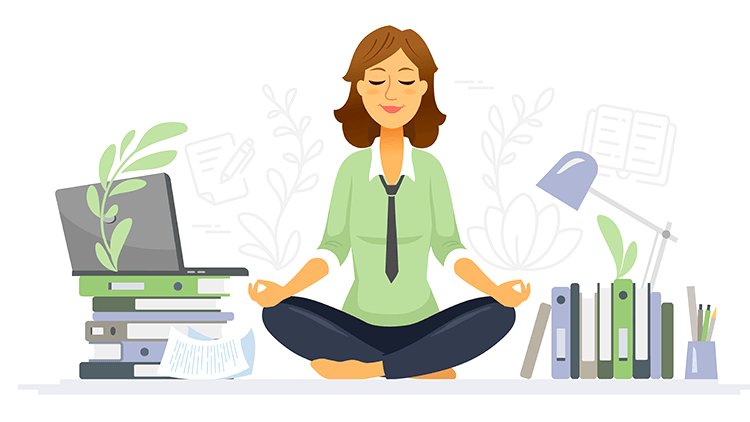

**Mental Health at Workplace**

Mental health affects your emotional, psychological and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make decisions.In the workplace, communication and inclusion are keys skills for successful high performing teams or employees. The impact of mental health to an organization can mean an increase of absent days from work and a decrease in productivity and engagement.


In this notebook, we'll explore the factors that affect an individual's mental health at workplace. This dataset analyzes the presence of mental health illnesses in the IT workplace as well as attitudes regarding mental health. 

# **About the Data**
The data contain 27 columns (features) and 1259 rows (values - candidates, who answered the questions)

**Column:Description**

*   **Timestamp**: Timestamp
*   **Age**: Age
*   **Gender**: Gender
*   **Country**: Country
*   **state**: If you live in the United States, which state or territory do you live in?
*   **self_employed**: Are you self-employed?
*   **family_history**: Do you have a family history of mental illness?
*   **treatment**: Have you sought treatment for a mental health condition?
*   **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
*   **no_employees**: How many employees does your company or organization have?
*   **remote_work**:	Do you work remotely (outside of an office) at least 50% of the time?
*   **tech_company**:	Is your employer primarily a tech company/organization?
*   **benefits**:	Does your employer provide mental health benefits?
*   **care_options**:	Do you know the options for mental health care your employer provides?
*   **wellness_program**:	Has your employer ever discussed mental health as part of an employee wellness program?
*   **seek_help**:	Does your employer provide resources to learn more about mental health issues and how to seek help?
*   **anonymity**:	Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
*   **leave**:	How easy is it for you to take medical leave for a mental health condition?
*   **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
*   **physhealth_consequence**:	Do you think that discussing a physical health issue with your employer would have negative consequences?
*   **coworkers**:	Would you be willing to discuss a mental health issue with your coworkers?
*   **supervisor**:	Would you be willing to discuss a mental health issue with your direct supervisor(s)?
*   **mental_health_interview**:	Would you bring up a mental health issue with a potential employer in an interview?
*   **physhealthinterview**:	Would you bring up a physical health issue with a potential employer in an interview?
*   **mentalvsphysical**:	Do you feel that your employer takes mental health as seriously as physical health?
*   **obs_consequence**:Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
*   **comments**:	Any additional notes or comments


# **Import Data**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Healthcare/survey (1).csv')

# **Preprocessing**

In [63]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## **Drop unnecessary columns**

Drop Timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant.

Drop Country column because it's contained with the country where respondents live and 60% of answer in domination in 1 country. This column becomes irrelevant to the prediction model.

Drop state column because it's only filled if the respondent lives in the US state, which means other respondents outside the US don't have any state ID and become missing values with 40% of data.

Drop comments column because almost 70% of data is missing. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.

In [64]:
df = df.drop(columns=['state', 'Timestamp','comments'])

## **Replacing Missing Values**

According to data description 'work_interfere' ask question 'If you have a mental health condition, do you feel that it interferes with your work?'.
We can assume that people that have left this field empty do not have a diagnosed mental condition. We changed all nan values to 'no answer'.

In [65]:
df['work_interfere'].fillna('no answer', inplace= True)

Because there is only 18 data points where we have nan values in column 'self_employed', we can just drop them

In [66]:
df.dropna(inplace=True)

print("\n",df['self_employed'].unique(),"\n")



 ['Yes' 'No'] 



In [67]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Age can't be less than 18 or negative.

Regarding the gender, people have described themselves as male and females in such different ways!
We will be using this approach for gender column: We will be renaming and combining all the categories that mean the same into one.

In [68]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The dataset contains different age groups including: 

[         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

In [69]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24,
       18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [70]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      975
Female    242
Other      19
Name: Gender, dtype: int64

In [71]:
north_america = ['United States','Canada','Mexico','Costa Rica','Bahamas, The']
south_america = ['Brazil','Colombia','Uruguay']
europe = ['France','United Kingdom','Portugal','Netherlands', 'Switzerland', 'Poland','Germany',
         'Russia','Slovenia','Austria','Ireland','Italy', 'Bulgaria', 'Sweden','Latvia', 'Romania',
         'Belgium','Spain', 'Finland','Bosnia and Herzegovina', 'Hungary','Croatia', 'Norway','Denmark',
         'Greece', 'Moldova','Czech Republic']
asia = ['Georgia','Singapore', 'Japan','Thailand','China','Philippines','India','Israel']
africa = ['Zimbabwe','Nigeria','South Africa']
oceania = ['Australia','New Zealand']
df['Country'].replace(to_replace=north_america, value='North_america',inplace=True)
df['Country'].replace(to_replace=south_america, value='South_america',inplace=True)
df['Country'].replace(to_replace=europe, value='Europe',inplace=True)
df['Country'].replace(to_replace=asia, value='Asia',inplace=True)
df['Country'].replace(to_replace=africa, value='Africa',inplace=True)
df['Country'].replace(to_replace=oceania, value='Oceania',inplace=True)

df['Country'].unique()

array(['North_america', 'Europe', 'Oceania', 'South_america', 'Asia',
       'Africa'], dtype=object)

In [72]:
df["treatment"].value_counts()

Yes    624
No     612
Name: treatment, dtype: int64

In [73]:
df["family_history"].value_counts()

No     753
Yes    483
Name: family_history, dtype: int64

In [74]:
df["benefits"].value_counts()

Yes           467
Don't know    401
No            368
Name: benefits, dtype: int64

In [75]:
df["work_interfere"].value_counts()

Sometimes    457
no answer    263
Never        207
Rarely       170
Often        139
Name: work_interfere, dtype: int64

In [76]:
df["care_options"].value_counts()

No          492
Yes         436
Not sure    308
Name: care_options, dtype: int64

In [77]:
df["wellness_program"].value_counts()

No            826
Yes           228
Don't know    182
Name: wellness_program, dtype: int64

In [78]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model**

In [79]:
!pip install addfips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import pandas as pd
import numpy as np
# from pandas_highcharts.core import serialize
# from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score,GridSearchCV,KFold,StratifiedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from imblearn.over_sampling import SMOTE

In [81]:
X = df.drop(['treatment', 'Country'],axis = 1)
y = df['treatment']

In [82]:
lbl = LabelEncoder()
y = lbl.fit_transform(y)

In [83]:
num_features = X.select_dtypes(include = np.number).columns.tolist()
# num_features.remove('MonthlyCharges')
cat_features = X.select_dtypes(include = 'object').columns.tolist()

In [84]:
# Categorical Pipeline by replacing missing values with most frequent value and one hot encoding
categorical_pipeline = Pipeline(steps=[
                                        ('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
# Numerical Pipeline by replacing outliers with median, replacing missing values with mean, and standardization

numerical_pipeline = Pipeline(steps=[
                                      # ('outliers',FunctionTransformer(replace_outliers,validate=False)),
                                       ('imputer', KNNImputer(missing_values=np.NaN)),
                                       ('normalize',MinMaxScaler())])
                              
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers =[
                                                
    ('num', numerical_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
], remainder = 'drop')

cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [85]:
# Logisitc Regression
model = LogisticRegression()
# smote = SMOTE(sampling_strategy=0.2)

# Finalizing the Pipeline
pipe_lg = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',model)])
# pipe_lg = make_pipeline(preprocessor,model)

# Evaluate the Model
scores = cross_validate(pipe_lg, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.919, Standard Deviation: (0.004)
AUC-Test : Cross Validation AUC 0.895, Standard Deviation: (0.039)
Accuracy Train : Cross Validation Accuracy: 0.847 
Accuracy Test : Cross Validation Accuracy: 0.826 


In [86]:
pipe_lg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('normalize',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
  

In [87]:
import pickle
import joblib

In [88]:

filename = 'model.sav'
pickle.dump(pipe_lg,open(filename,'wb'))

file = 'pipe.joblib'
pipe_lg.fit(X,y)
joblib.dump(pipe_lg,file)
load_pipe = joblib.load(file)

In [89]:
load_pipe.predict(X)

array([1, 0, 1, ..., 1, 0, 1])

In [90]:
loaded_model = pickle.load(open('model.sav','rb'))

In [91]:
param_grid  = {'model__C': [0.1,0.15,0.2,1], 
                  'model__tol': [0.0001,0.001,0.01],
                    'model__max_iter':[100,1000,5000,10000]
             }

pipeline_grid_lr = Pipeline(steps=[
                        ('preprocess',preprocessor),
                        ('model', model)
])

optimal_lr = GridSearchCV(pipeline_grid_lr, param_grid = param_grid, scoring = 'roc_auc',cv = cv)

optimal_lr = optimal_lr.fit(X,y)

optimal_lr.best_params_

{'model__C': 0.2, 'model__max_iter': 100, 'model__tol': 0.0001}

logistic Regression

In [92]:
lr_model = optimal_lr.best_estimator_

# Evaluate the Model
scores = cross_validate(lr_model, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.916, Standard Deviation: (0.004)
AUC-Test : Cross Validation AUC 0.896, Standard Deviation: (0.038)
Accuracy Train : Cross Validation Accuracy: 0.842 
Accuracy Test : Cross Validation Accuracy: 0.821 


XGBoost

In [93]:
param_gird = {'model__n_estimators': [80, 90, 100, 110, 115, 120],
                   'model__max_depth': [3, 4, 5, 6],
                   'model__max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'model__min_samples_split': [2, 3, 4, 5]}


pipeline_grid_xgb = Pipeline(steps=[
                        ('preprocess',preprocessor),
                        ('model', model)
])

optimal_xgb = GridSearchCV(pipeline_grid_xgb, param_grid = param_grid, scoring = 'roc_auc',cv = cv)

optimal_xgb = optimal_xgb.fit(X,y)

optimal_xgb.best_params_

{'model__C': 0.2, 'model__max_iter': 100, 'model__tol': 0.0001}

In [94]:
xgb_model = optimal_xgb.best_estimator_

# Evaluate the Model
scores = cross_validate(xgb_model, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.916, Standard Deviation: (0.004)
AUC-Test : Cross Validation AUC 0.896, Standard Deviation: (0.038)
Accuracy Train : Cross Validation Accuracy: 0.842 
Accuracy Test : Cross Validation Accuracy: 0.821 


Random Forest

In [95]:

model = xgb.XGBClassifier()

# Finalizing the Pipeline
pipe_xgb = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',model)])
pipe_xgb = make_pipeline(preprocessor,model)

# Evaluate the Model
scores = cross_validate(pipe_xgb, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.950, Standard Deviation: (0.002)
AUC-Test : Cross Validation AUC 0.891, Standard Deviation: (0.035)
Accuracy Train : Cross Validation Accuracy: 0.866 
Accuracy Test : Cross Validation Accuracy: 0.828 


In [96]:
model = GradientBoostingClassifier()

# Finalizing the Pipeline
pipe_gb= Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',model)])


# Evaluate the Model
scores = cross_validate(pipe_gb, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.961, Standard Deviation: (0.002)
AUC-Test : Cross Validation AUC 0.891, Standard Deviation: (0.034)
Accuracy Train : Cross Validation Accuracy: 0.880 
Accuracy Test : Cross Validation Accuracy: 0.825 


In [97]:
param_grid = {'model__n_estimators': [50, 100, 500],
                   'model__max_depth': [3, 4, 5], 
                   'model__learning_rate': [0.01, 0.1, 1]}


pipeline_grid_gb = Pipeline(steps=[
                        ('preprocess',preprocessor),
                        ('model', model)
])

optimal_gb = GridSearchCV(pipeline_grid_gb, param_grid = param_grid, scoring = 'roc_auc',cv = cv)

optimal_gb = optimal_gb.fit(X,y)

optimal_gb.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 4,
 'model__n_estimators': 100}

In [98]:
gb_model = optimal_gb.best_estimator_

# Evaluate the Model
scores = cross_validate(gb_model, X, y, scoring= ['roc_auc','accuracy'], cv = cv, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('AUC-Train : Cross Validation AUC: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_roc_auc']), np.std(scores['train_roc_auc'])))
print('AUC-Test : Cross Validation AUC %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_roc_auc']), np.std(scores['test_roc_auc'])))
print('Accuracy Train : Cross Validation Accuracy: %.3f '% np.mean(scores['train_accuracy']))
print('Accuracy Test : Cross Validation Accuracy: %.3f '% np.mean(scores['test_accuracy']))

AUC-Train : Cross Validation AUC: 0.916, Standard Deviation: (0.003)
AUC-Test : Cross Validation AUC 0.895, Standard Deviation: (0.031)
Accuracy Train : Cross Validation Accuracy: 0.834 
Accuracy Test : Cross Validation Accuracy: 0.828 


In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y,shuffle=True, random_state = 42)

In [100]:
from sklearn.metrics import roc_auc_score,accuracy_score
pipe_gb.fit(X_train,y_train)
pred  = pipe_gb.predict(X_test)

In [101]:
accuracy_score(y_test,pred)

0.8104838709677419

In [102]:
model = RandomForestClassifier()
pipe_rf= Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',model)])

pipe_rf.fit(X_train,y_train)
pred  = pipe_rf .predict(X_test)

In [103]:
accuracy_score(y_test,pred)

0.8024193548387096

In [104]:
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,n_estimators = 500)
pipe_gb = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',model)])

pipe_gb.fit(X_train,y_train)
pred  = pipe_gb .predict(X_test)

In [105]:
predictions = pipe_gb.predict_proba(X)

In [106]:
predictions

array([[0.31285657, 0.68714343],
       [0.97510141, 0.02489859],
       [0.13763427, 0.86236573],
       ...,
       [0.1069211 , 0.8930789 ],
       [0.96764182, 0.03235818],
       [0.08292111, 0.91707889]])

In [107]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,North_america,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,Europe,Yes,Yes,No,no answer,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,North_america,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,North_america,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,North_america,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,Europe,No,No,Yes,no answer,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,North_america,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,North_america,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,North_america,No,No,No,no answer,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [108]:
treatment_index = []
for i in range(len(predictions)):
  treatment_index.append(predictions[i][1])

In [109]:
df['treatment_index'] = np.round(treatment_index,2)

In [110]:
df['treatment_index']

18      0.69
19      0.02
20      0.86
21      0.06
22      0.94
        ... 
1254    0.25
1255    0.95
1256    0.89
1257    0.03
1258    0.92
Name: treatment_index, Length: 1236, dtype: float64

In [111]:
df['treatment']

18       No
19       No
20      Yes
21       No
22      Yes
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1236, dtype: object

In [112]:
df.to_csv('/content/drive/MyDrive/sarah/output.csv',index=False)

In [113]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.
        X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        scoring = 'roc_auc',
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)   
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
                alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

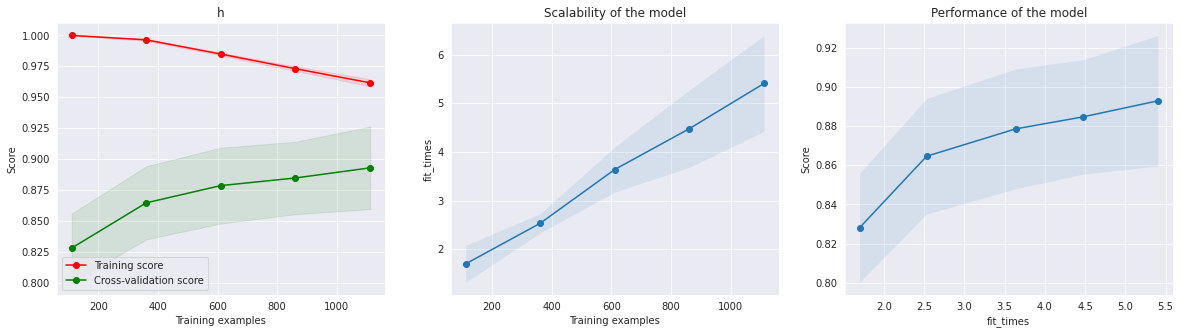

In [114]:
cv = StratifiedKFold(n_splits=10,shuffle = True, random_state=123)
plot_learning_curve(
    pipe_gb, title = "h",X=X, y=y, cv=cv, n_jobs=4
)

In [115]:
cv

StratifiedKFold(n_splits=10, random_state=123, shuffle=True)